# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [109]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

PCA dimensions that will show up 1st are the ones that explain maximum number of variance in the dataset. The features that drive the data most (in terms of variance). PCA will be focused more on the global picture of the dataset (aspects that define large scale terrain).
	
ICA dimensions will show up as maximally independent vectors, ICA will try to differentiate between mixed signals (dimensions). Each vector will be a maximally independent feature (description) of the given dataset. ICA will be focused more on the detailed aspects of the dataset.


###PCA

In [110]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

The variance drops off very quickly while 1st and 2nd dimensions are 0.45961362 and  0.40517227 respectively the 3rd dimension is only 0.07003008 that’s a drop of almost 6 times from 2nd dimension to 3rd dimension. 4th, 5th and 6th are 0.04402344, 0.01502212  and 0.00613848 respectively, a drop of almost 1/2 from 3rd to 4th, a drop of about 3 times from 4th to 5th and a drop of another ~3 times from 5th to 6th.

Running PCA on this dataset, selecting 1st and 2nd dimension should provide for most of dataset explanation, 1st and 2nd dimensions have by far the most variance.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

The 1st (0.45961362) and 2nd (0.40517227) PCA dimensions represent the two most varied dimensions the ones that account for most of the variance of the entire dataset. 

Given the fact that 1st and 2nd dimensions represent most of the data (~86% of the total dimensions) and the next dimension represents only ~7%, we can use only the 1st two dimensions to describe most of the data, we can rerun PCA to compress the data to two dimensions to more easily model the data and visualize it, without loosing too much of the information.


###ICA

In [111]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA

ica = FastICA()
ica.fit(data)

# Print the independent components
print ica.components_

[[  3.97576557e-06  -8.57254897e-07  -6.17219879e-07  -6.78133893e-07
    2.04527959e-06  -1.04758551e-06]
 [  2.11703304e-07  -1.89213458e-06   6.35435069e-06   4.20217695e-07
   -6.45833075e-07  -1.42394598e-06]
 [  3.01161805e-07  -2.28563456e-06  -1.21025660e-05   1.46019752e-06
    2.82157150e-05   5.73166259e-06]
 [  8.65269800e-07   1.40138406e-07  -7.74153071e-07  -1.11460704e-05
    5.56424387e-07   5.95267821e-06]
 [  3.86406504e-07   2.19537314e-07   6.01293843e-07   5.21983907e-07
   -5.10024759e-07  -1.80927246e-05]
 [  1.52861255e-07   9.84931486e-06  -5.80009811e-06  -3.65818420e-07
    3.28310258e-06  -6.06267702e-06]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

The components that arise from ICA are 6 maximally independent vectors that pickup on the detailed aspects of data (from the 6 input dimensions that might have been mixed obfuscating the information/possible structure). 6 maximally independent features of the dataset. 

ICA is not used to compress dimensionality (unlike PCA), it’s used to clear up the “signal”, to separate most independent information, to potentially reveal patterns that might have been hidden by possible mixture/noise in the dataset. 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

K-means is a hard assignment each iteration it’s sure to what cluster the data belongs. K-means advantage is that it scales to large number of samples, it will always converge but may be to a local minimum (this depends on the initial location of the centroids). The assumption is the clusters are convex and isotropic, so some disadvantages are that it does not respond well to elongated clusters or irregular shapes.

Gaussian mixture is soft assignment, each iteration it assigns probability to each point (how sure it is that its in particular cluster), some advantages are it will not diverge and works with any distribution. However it does have some disadvantages, for example it can get stuck and will need to have a random restart.

Gaussian mixture will be selected, as simple cluster shapes (more suitable for K-means) are not expected, clearly defined clusters are not expected, more of a Gaussian distribution is expected, as customers can be expected to be spanning a relatively large distribution with no clear class association. A probabilistic model is more suitable.

There is no clear way to tell the number of clusters in the dataset, so different cluster numbers will be tried and adjusted taking the visualizations into consideration.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [112]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [113]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(data)

#test
#ica = FastICA()
#reduced_data = ica.fit_transform(reduced_data)

print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [114]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
#clusters = KMeans(n_clusters=5)
clusters = GMM(n_components=4, random_state=42)
clusters.fit(reduced_data)

print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=42,
  thresh=None, tol=0.001, verbose=0)


In [115]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [116]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.means_
print centroids

[[  2339.15204219  -6708.93065712]
 [-15372.37194307  -3334.43379857]
 [  7174.54719282   5469.02876453]
 [ -9486.9742574   34645.20428228]]


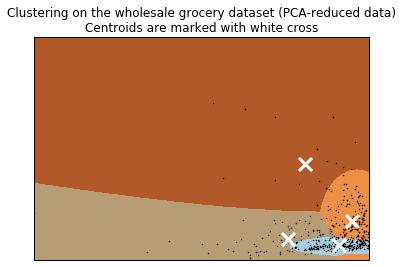

In [117]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

Four clusters seem to make since for this dataset, the “x” in each cluster represents the mean of the cluster or the average customer for each cluster. There is no extremly defined regular clusters in the visualization, yet I would argue there are two relatively defined clusters (customers), the most bottom horizontally elongated (horizontally variad) one and the most to the right vertically varied one (although not as variad as the 1st cluster). The other two clusters are almost outliers, yet they represent the largest customers on both sides, this is why the second pair of clusters (customer types) also need to be included as classes. In the end it looks like there are four major types of customers.

Running ICA on the PCA output (and then using the ICA output with Gaussian mixture) might make the clusters more pronounced/defined. ICA should be able to remove some of the noise/mix in the data.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

Two techniques have made this model possible PCA and Gaussian mixture. 

PCA identified the number of dimensions most responsible for the data variance by running PCA in the same dimension as the dataset, PCA identified and ordered the dimensions by maximum variance ratio, where the variance ratio was used in the next step of PCA (reduction of dimensions). In this second step, PCA reduced the number of dimensions to those that most explain the maximum variance (two dimensions in this case).

Gaussian mixture using the reduced dimension dataset identified clusters/customers by using probabilistic assignment of points to a given cluster (soft assignment). The clusters then can be visualized for visual inspection of the dataset and its clusters/customer types.

Additionally it was invaluable to identify the final cluster number by visually inspecting the graph with initial test/guess cluster number.

**9)** How would you use that technique to help the company design new experiments?

Answer: 

We can use the same techniques to identify and categorize customers using other data to find other customer types, for example customer types based on payment preference correlated to types of orders or other customer data. 

If another experiment was conducted and certain customer preferences identified we can run similar customer models before implementing particular measures to make sure the measures proposed will not negatively impact a customer subset, or to positively impact particular customer subset.

**10)** How would you use that data to help you predict future customer needs?

Answer: 

By identifying the classes/types of customers (as we have done above) and knowing each of the existing customers preference on delivery we can match class of customer to delivery preference. Therefore we can predict delivery preferences of future customers by the types of orders those customers have a preference for or have placed. In addition we can predict the customer orders by knowing the delivery preference.

Note: there might be other preferences that can be predicted if we can correlate them with the order types or vice versa.